# Electric Vehicle Population Data

**We will explore the Electric Vehicle Population Data set and perform the exploratory data analysis on the dataset.:**

- **Checking duplicates**
- **Missing value treatment**
- **Outlier checking and Information**
- **Univerate Analysis**
- **Bivariate Analysis**
- **ANOVA TEST**
  


# Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading the data set

**Loading the EV cars csv file using pandas. For this we will be using read_csv file.**

In [85]:
df=pd.read_csv(r'C:\Users\Hp\Downloads\Electric-Vehicle-Population-Data_YD.csv')

# Basic Data Exploration 

**In this step, we will perform the below operations to check what the data set comprises of. We will check the below things:**

- **head of the dataset**
- **shape of the dataset**
- **info of the dataset**
- **summary of the dataset**

In [86]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WA1E2AFY8R,Thurston,Olympia,WA,98512.0,2024,AUDI,Q5 E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,23,0,22.0,263239938,POINT (-122.90787 46.9461),PUGET SOUND ENERGY INC,5.306701e+10
1,WAUUPBFF4J,Yakima,Wapato,WA,98951.0,2018,AUDI,A3,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,16,0,15.0,318160860,POINT (-120.42083 46.44779),PACIFICORP,5.307794e+10
2,1N4AZ0CP0F,King,Seattle,WA,98125.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,46.0,184963586,POINT (-122.30253 47.72656),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
3,WA1VAAGE5K,King,Kent,WA,98031.0,2019,AUDI,E-TRON,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,204,0,11.0,259426821,POINT (-122.17743 47.41185),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,7SAXCAE57N,Snohomish,Bothell,WA,98021.0,2022,TESLA,MODEL X,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,208182236,POINT (-122.18384 47.8031),PUGET SOUND ENERGY INC,5.306105e+10


**head function will tell you the top records in the data set. By default python shows you only top 5 records.**

In [87]:
df.shape

(264624, 17)

**Shape attribute tells us number of observations and variables we have in the data set. It is used to check the dimension of data. The cars data set has 303 observations and 13 variables in the data set.**

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264624 entries, 0 to 264623
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         264624 non-null  object 
 1   County                                             264615 non-null  object 
 2   City                                               264615 non-null  object 
 3   State                                              264624 non-null  object 
 4   Postal Code                                        264615 non-null  float64
 5   Model Year                                         264624 non-null  int64  
 6   Make                                               264624 non-null  object 
 7   Model                                              264624 non-null  object 
 8   Electric Vehicle Type                              264624 non-null  object

In [89]:
 # Converting variables into Categorical variables
df['Postal Code'] = pd.Categorical(df['Postal Code'])
df['Legislative District'] = pd.Categorical(df['Legislative District'])
df['2020 Census Tract'] = pd.Categorical(df['2020 Census Tract'])

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264624 entries, 0 to 264623
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         264624 non-null  object  
 1   County                                             264615 non-null  object  
 2   City                                               264615 non-null  object  
 3   State                                              264624 non-null  object  
 4   Postal Code                                        264615 non-null  category
 5   Model Year                                         264624 non-null  int64   
 6   Make                                               264624 non-null  object  
 7   Model                                              264624 non-null  object  
 8   Electric Vehicle Type                              264624 non-nu

In [91]:
df.describe()

,Model Year,Electric Range,Base MSRP,DOL Vehicle ID
count,264624.000000,264624.000000,264624.000000,2.646240e+05
mean,2021.842509,41.713159,678.902197,2.422534e+08
std,3.044093,80.377977,6868.919926,6.516059e+07
min,1999.000000,0.000000,0.000000,4.385000e+03
25%,2021.000000,0.000000,0.000000,2.174446e+08
50%,2023.000000,0.000000,0.000000,2.603596e+08
75%,2024.000000,34.000000,0.000000,2.758919e+08
max,2026.000000,337.000000,845000.000000,4.791150e+08


**The describe method will help to see how data has been spread for the numerical values. We can clearly see the minimum value, mean values, different percentile values and maximum values.**

# Check for Duplicate records

In [92]:
# Check for duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df[dups]

Number of duplicate rows = 0


,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract


In [93]:
print('The duplicate rows = {}'.format(dups.sum()))

The duplicate rows = 0


In [94]:
print('The duplicate rows = ',dups.sum())

The duplicate rows =  0


**We clearly see there are no duplicates.**

In [95]:
df.shape

(264624, 17)

# Outlier Treatment

**To check for outliers, we will be plotting the box plots.**

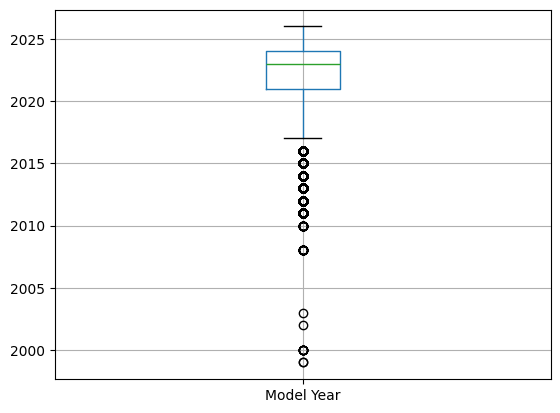

In [96]:
df.boxplot(column=['Model Year'])
plt.show()

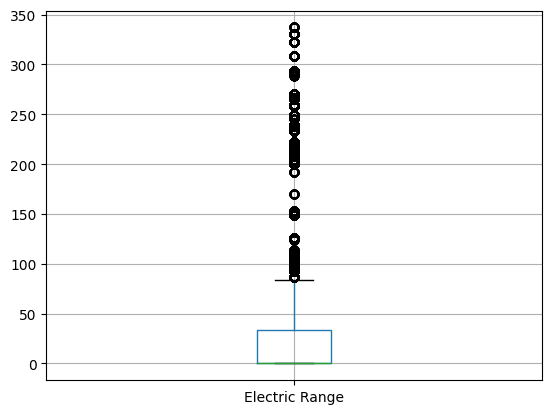

In [97]:
df.boxplot(column=['Electric Range'])
plt.show()

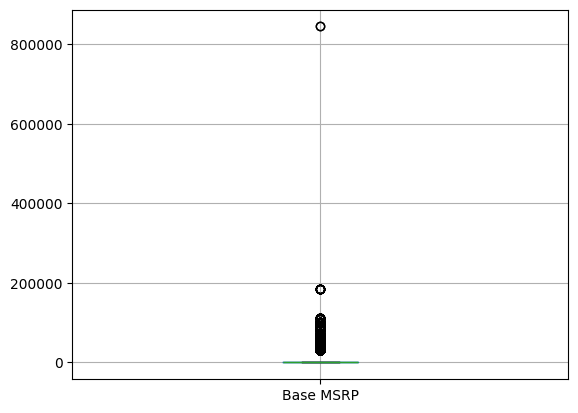

In [98]:
df.boxplot(column=['Base MSRP'])
plt.show()

In [99]:
# These Boxplot clearly show there is some issue with the data in ELectric Range and Base MSRP

# Check for missing value

In [100]:
# Check for missing value in any column
df.isnull().sum()[df.isnull().sum()>0]

County                    9
City                      9
Postal Code               9
Legislative District    659
Vehicle Location         17
Electric Utility          9
2020 Census Tract         9
dtype: int64

**We can see that we have various missing values in respective columns.** **In this dataset, we will replace categorical columns we will replace the missing values with mode values.**

In [101]:
df[df.isnull().sum()[df.isnull().sum()>0].index].dtypes

County                    object
City                      object
Postal Code             category
Legislative District    category
Vehicle Location          object
Electric Utility          object
2020 Census Tract       category
dtype: object

**Replacing NULL values in Categorical Columns using Mode**

In [102]:
mode1 = df['County'].mode().values[0]
mode2 = df['City'].mode().values[0]
mode3 = df['Postal Code'].mode().values[0]
mode4 = df['Legislative District'].mode().values[0]
mode5 = df['Vehicle Location'].mode().values[0]
mode6 = df['Electric Utility'].mode().values[0]
mode7 = df['2020 Census Tract'].mode().values[0]


df['County']=df['County'].replace(np.nan,mode1)
df['City']=df['City'].replace(np.nan,mode2)
df['Postal Code']=df['Postal Code'].replace(np.nan,mode3)
df['Legislative District']=df['Legislative District'].replace(np.nan,mode4)
df['Vehicle Location']=df['Vehicle Location'].replace(np.nan,mode5)
df['Electric Utility']=df['Electric Utility'].replace(np.nan,mode6)
df['2020 Census Tract']=df['2020 Census Tract'].replace(np.nan,mode7)


In [103]:
# Check for missing value in any column
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 659
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      9
dtype: int64

In [104]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            9
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 659
DOL Vehicle ID                                         0
Vehicle Location                                       0
Electric Utility                                       0
2020 Census Tract                                      9
dtype: int64

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264624 entries, 0 to 264623
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype   
---  ------                                             --------------   -----   
 0   VIN (1-10)                                         264624 non-null  object  
 1   County                                             264624 non-null  object  
 2   City                                               264624 non-null  object  
 3   State                                              264624 non-null  object  
 4   Postal Code                                        264615 non-null  category
 5   Model Year                                         264624 non-null  int64   
 6   Make                                               264624 non-null  object  
 7   Model                                              264624 non-null  object  
 8   Electric Vehicle Type                              264624 non-nu

# Univariate Analysis

<Axes: xlabel='Model Year', ylabel='Count'>

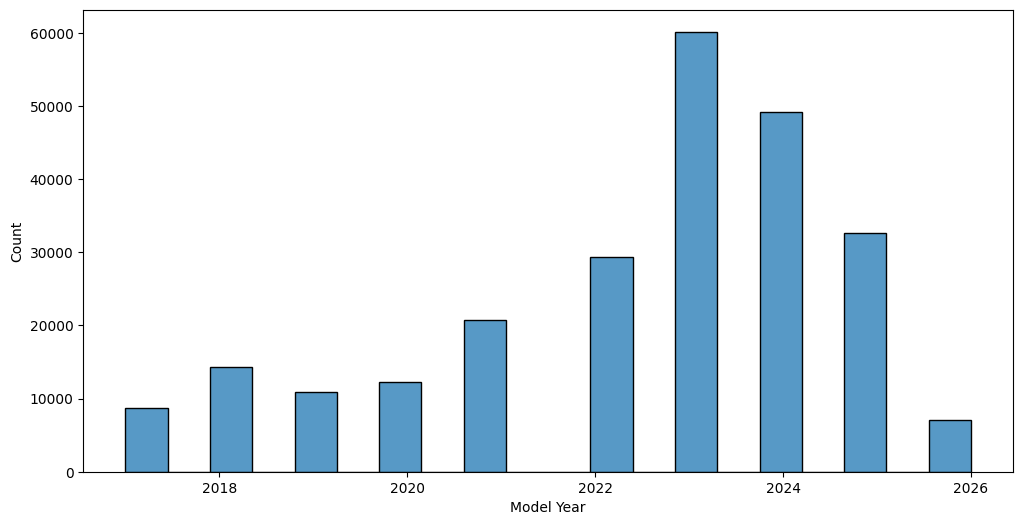

In [106]:

top10 = df["Model Year"].value_counts().nlargest(10).index
df_top10 = df[df["Model Year"].isin(top10)]
plt.figure(figsize=(12,6))
sns.histplot(data=df_top10,x='Model Year', bins=20)

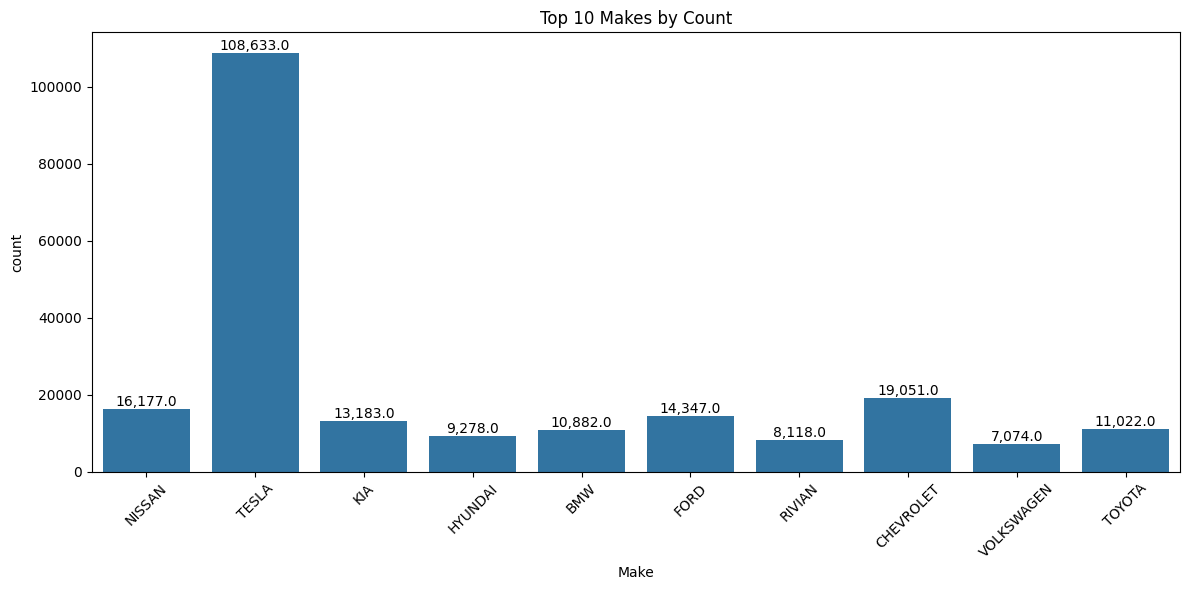

In [107]:
top10 = df["Make"].value_counts().nlargest(10).index
df_top10 = df[df["Make"].isin(top10)]

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_top10, x="Make")

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.xticks(rotation=45)
plt.title("Top 10 Makes by Count")
plt.tight_layout()
plt.show()


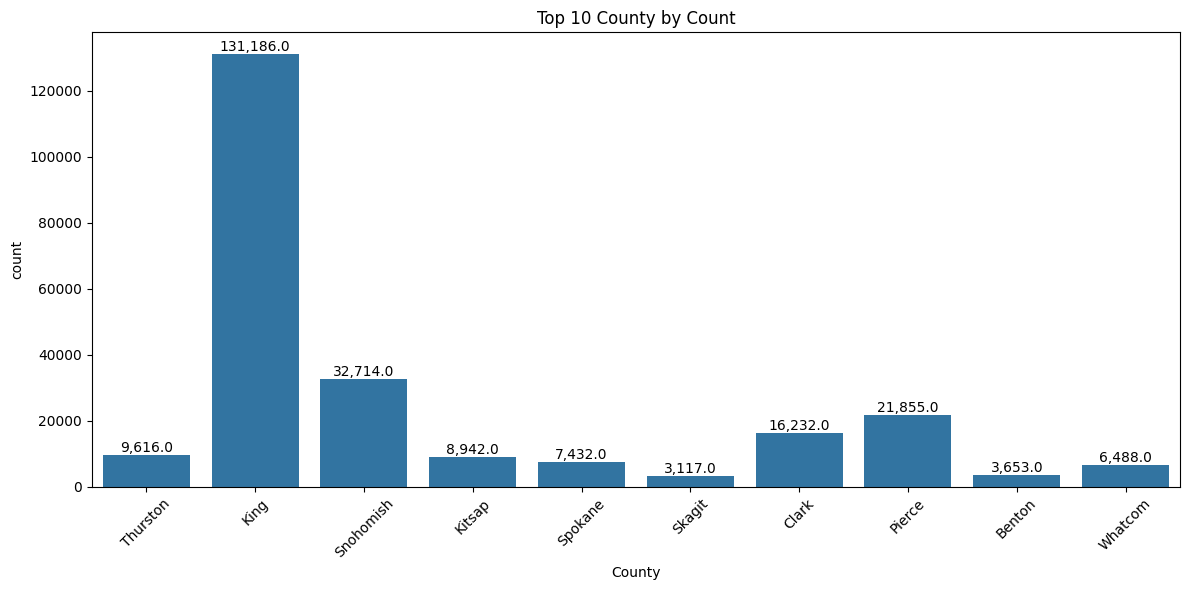

In [108]:
top10 = df["County"].value_counts().nlargest(10).index
df_top10 = df[df["County"].isin(top10)]

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_top10, x="County")

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(
        format(p.get_height(), ','),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom', fontsize=10
    )

plt.xticks(rotation=45)
plt.title("Top 10 County by Count")
plt.tight_layout()
plt.show()


From above figure, we can say that EV adoption spiked between 2022-2023


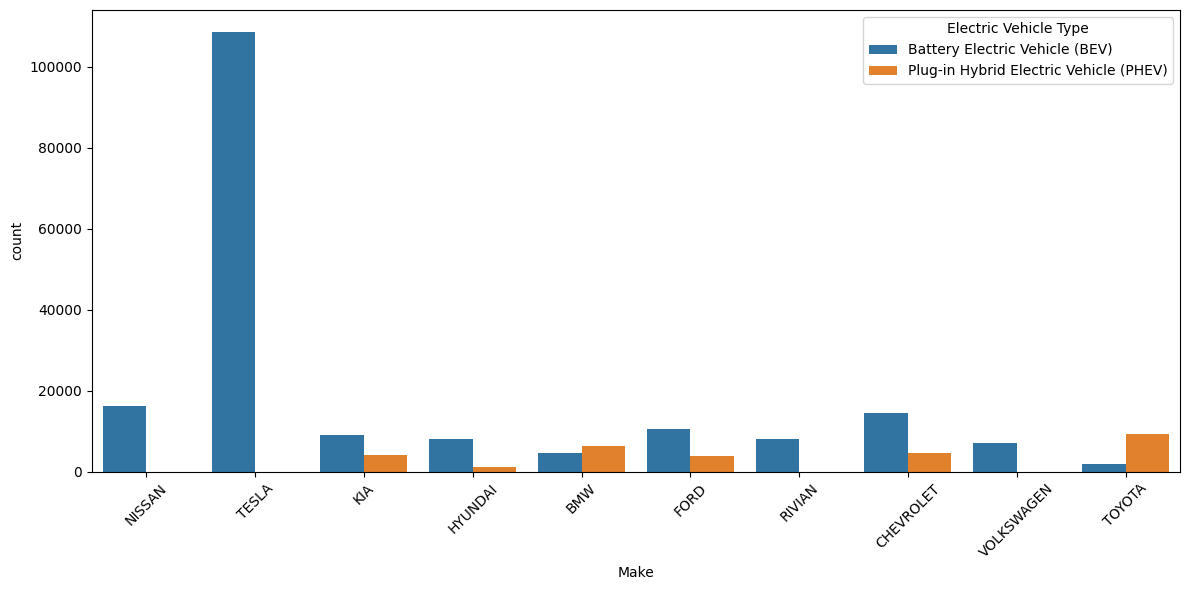

In [109]:
top10 = df["Make"].value_counts().nlargest(10).index
df_top10 = df[df["Make"].isin(top10)]
plt.figure(figsize=(12,6))
sns.countplot(data=df_top10, x="Make", hue="Electric Vehicle Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


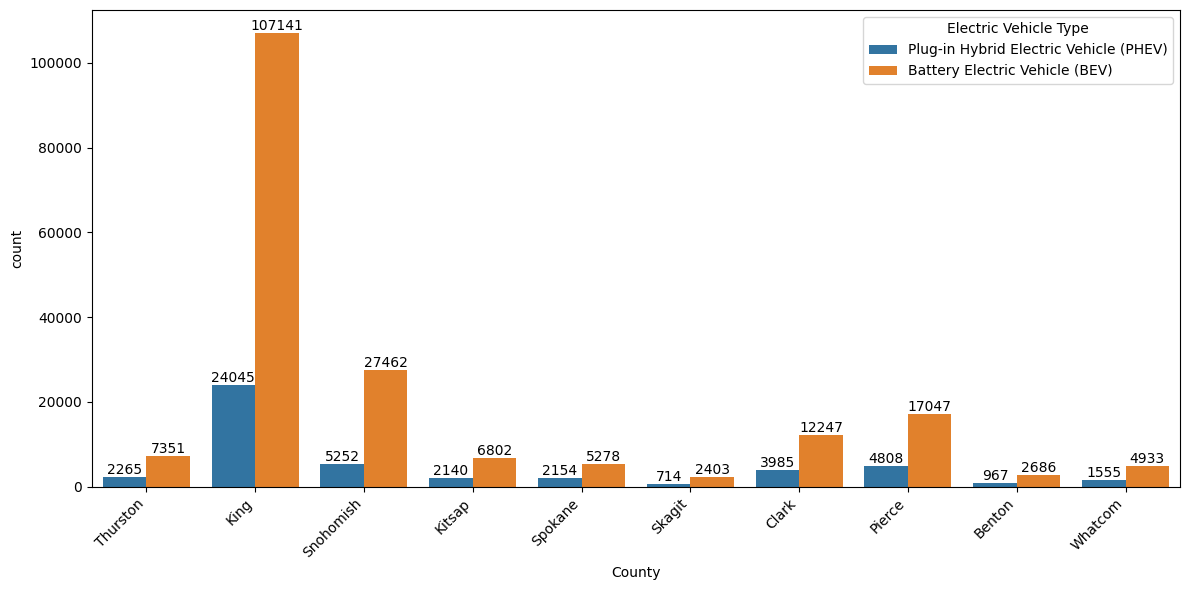

In [110]:
top10 = df["County"].value_counts().nlargest(10).index
df_top10 = df[df["County"].isin(top10)]

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_top10, x="County", hue="Electric Vehicle Type")
plt.xticks(rotation=45, ha='right')

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


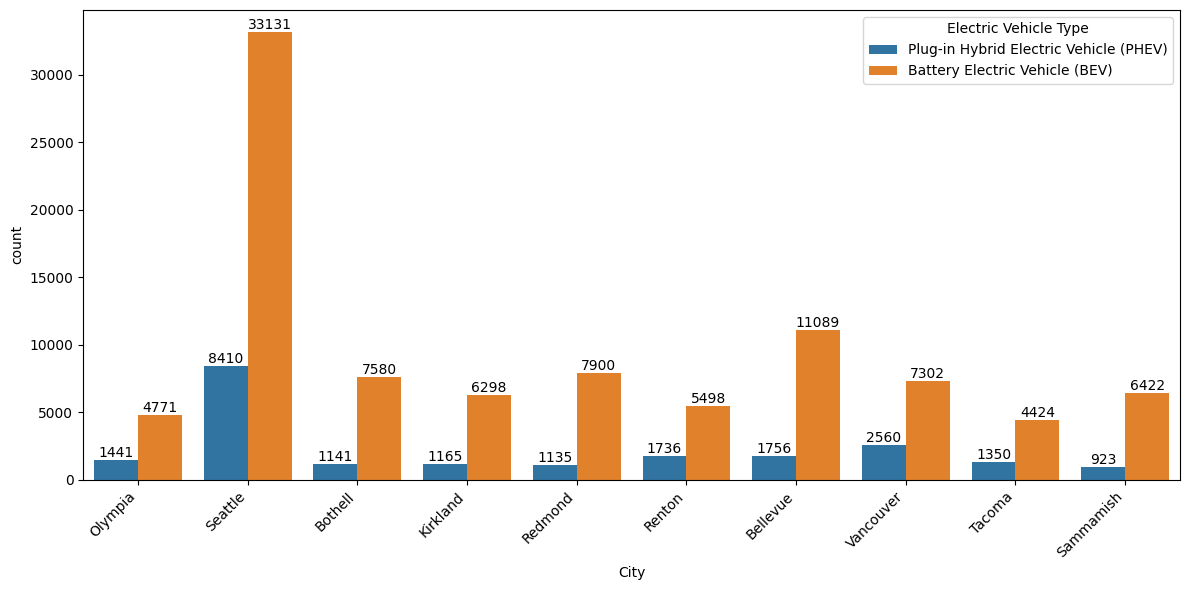

In [111]:
top10 = df["City"].value_counts().nlargest(10).index
df_top10 = df[df["City"].isin(top10)]

plt.figure(figsize=(12,6))
ax = sns.countplot(data=df_top10, x="City", hue="Electric Vehicle Type")
plt.xticks(rotation=45, ha='right')

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container)

plt.tight_layout()
plt.show()


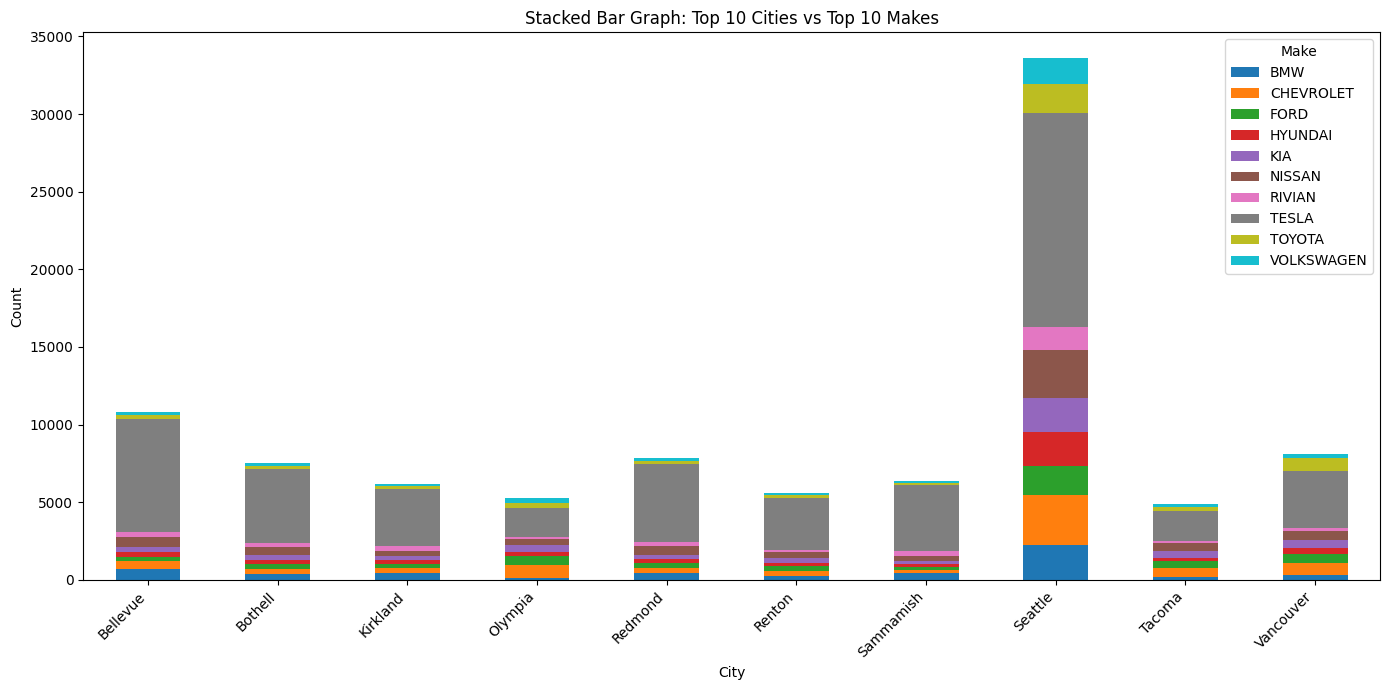

In [112]:
top10_counties = df["City"].value_counts().nlargest(10).index
top10_makes = df["Make"].value_counts().nlargest(10).index

df_top = df[df["City"].isin(top10_counties) & df["Make"].isin(top10_makes)]
pivot = df_top.pivot_table(
    index="City", 
    columns="Make", 
    aggfunc="size", 
    fill_value=0
)
pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(14,7)
)

plt.title("Stacked Bar Graph: Top 10 Cities vs Top 10 Makes")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Bivariate Analysis

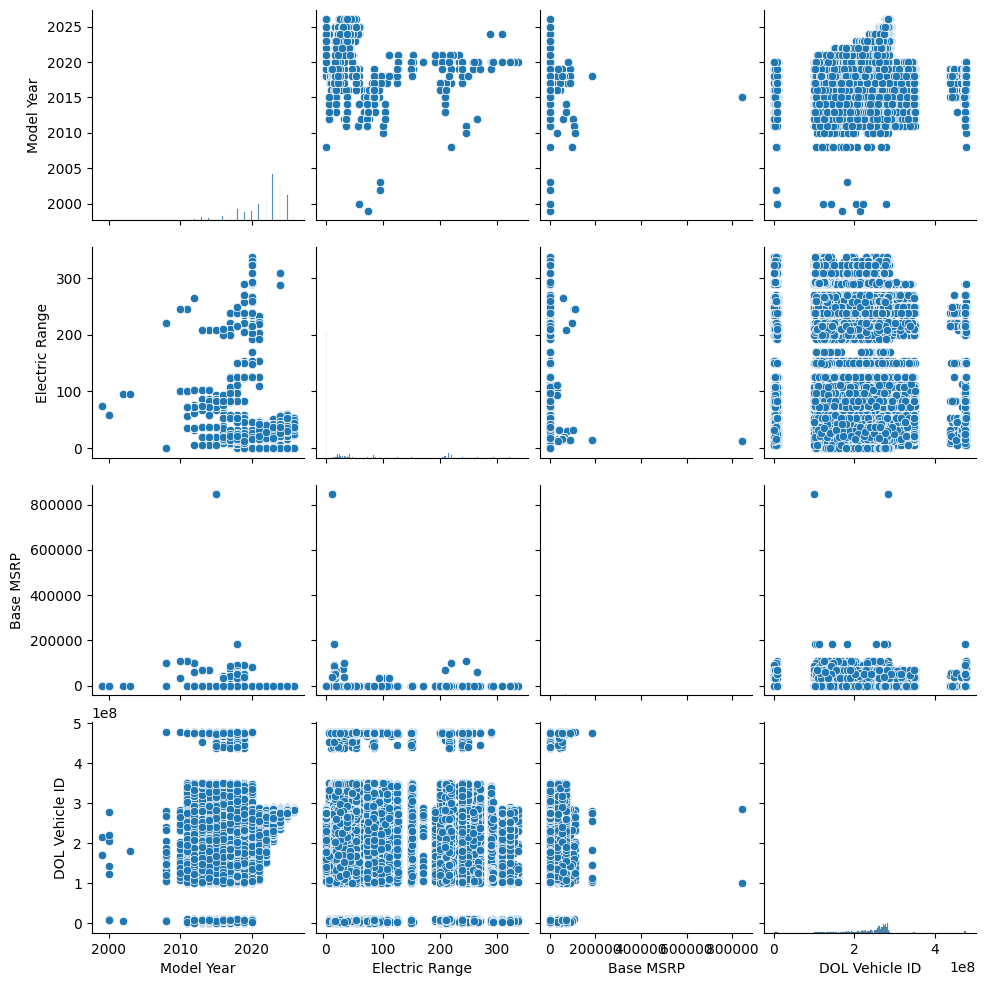

In [113]:
    #Pairplot of all variables
sns.pairplot(df)
plt.show()

**In the above plot scatter diagrams are plotted for all the numerical columns in the dataset. A scatter plot is a visual representation of the degree of correlation between any two columns. The pair plot function in seaborn makes it very easy to generate joint scatter plots for all the columns in the data.**

## Correlation Heatmap

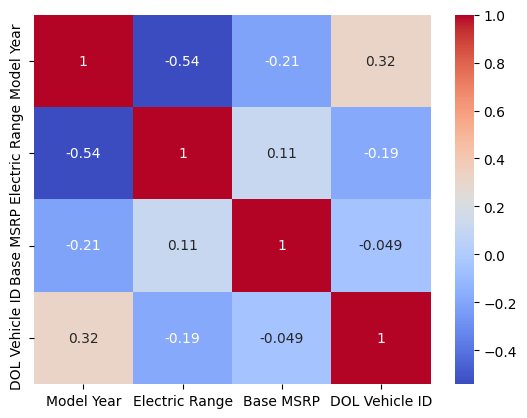

In [114]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


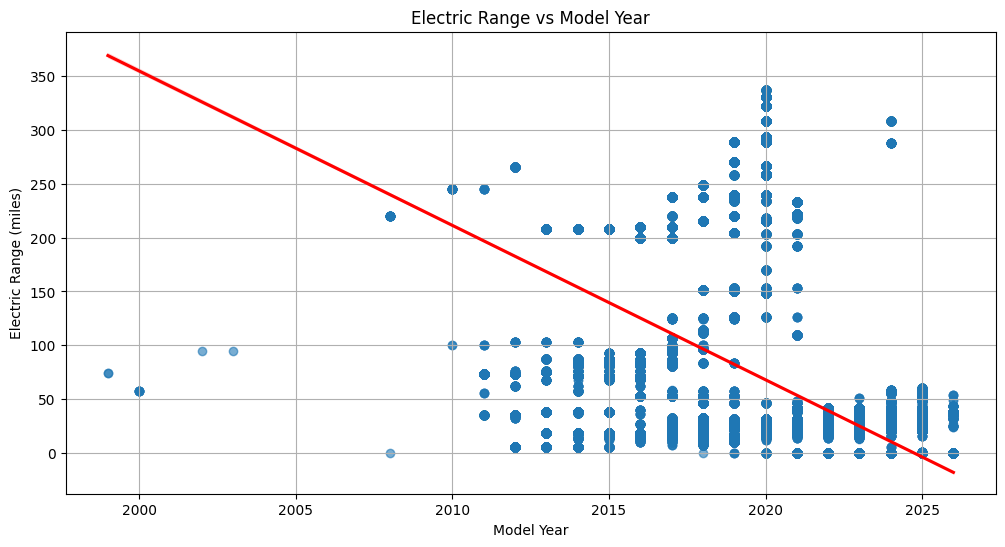

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(12,6))
sns.regplot(
    data=df, 
    x="Model Year", 
    y="Electric Range", 
    scatter_kws={"alpha":0.6},  # makes points slightly transparent
    line_kws={"color":"red"}
)

plt.title("Electric Range vs Model Year")
plt.xlabel("Model Year")
plt.ylabel("Electric Range (miles)")
plt.grid(True)
plt.show()


In [116]:
#** NO LINEAR RELATION BETWEEN THESE TWO VARIABLES**

In [117]:
df_clean = df[df["Electric Range"] > 5]  


In [118]:
df["Electric Range"] = df["Electric Range"].replace([0,1,2,3,4,5,6,7,8,9,10], 0)


In [119]:
df["Electric Range"] = df.groupby("Make")["Electric Range"].transform(
    lambda x: x.replace(0, x.mean())
)


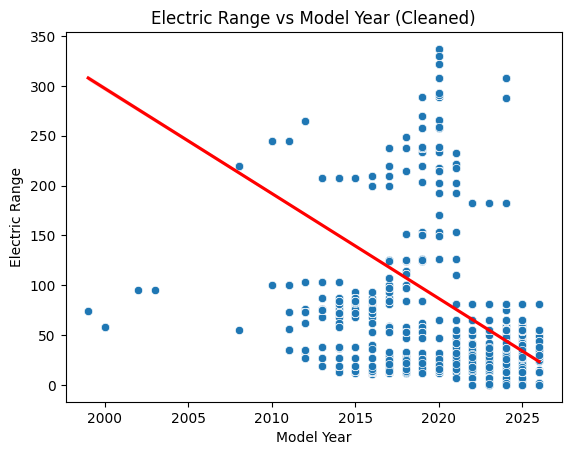

In [120]:
sns.scatterplot(data=df, x="Model Year", y="Electric Range")
sns.regplot(data=df, x="Model Year", y="Electric Range", scatter=False, color="red")
plt.title("Electric Range vs Model Year (Cleaned)")
plt.show()


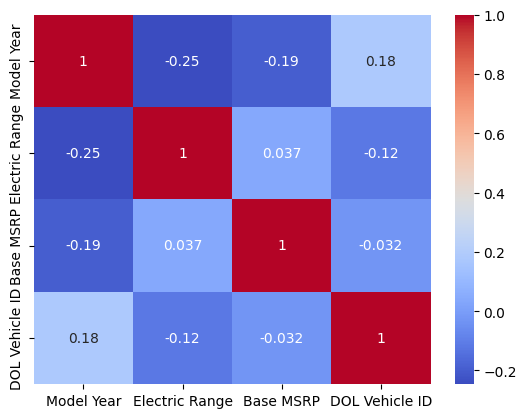

In [121]:
corr_matrix = df_clean.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [122]:
# Average electric range per make
make_range_mean = df_clean.groupby("Make")["Electric Range"].mean().sort_values(ascending=False)
print("Average Electric Range per Make:\n", make_range_mean)


Average Electric Range per Make:
 Make
TESLA                   241.260059
JAGUAR                  234.000000
POLESTAR                233.000000
CHEVROLET               151.074993
VOLKSWAGEN              107.045198
NISSAN                  105.907252
WHEEGO ELECTRIC CARS    100.000000
TH!NK                   100.000000
PORSCHE                  92.835306
FIAT                     85.580214
HYUNDAI                  75.574169
AUDI                     73.292944
KIA                      71.405185
SMART                    61.982833
AZURE DYNAMICS           56.000000
LAND ROVER               48.975124
HONDA                    46.538462
MINI                     45.810959
BMW                      45.015205
MERCEDES-BENZ            43.298198
LEXUS                    36.798408
CADILLAC                 36.755814
TOYOTA                   33.265573
ALFA ROMEO               33.000000
FISKER                   33.000000
MITSUBISHI               32.424613
BENTLEY                  32.375000
CHRYSLER        

In [123]:
top10_makes = df["Make"].value_counts().nlargest(10).index
df_top = df[df["Make"].isin(top10_makes)]


In [124]:
top10_makes = df_clean["Make"].value_counts().nlargest(10).index
df_top = df_clean[df_clean["Make"].isin(top10_makes)]


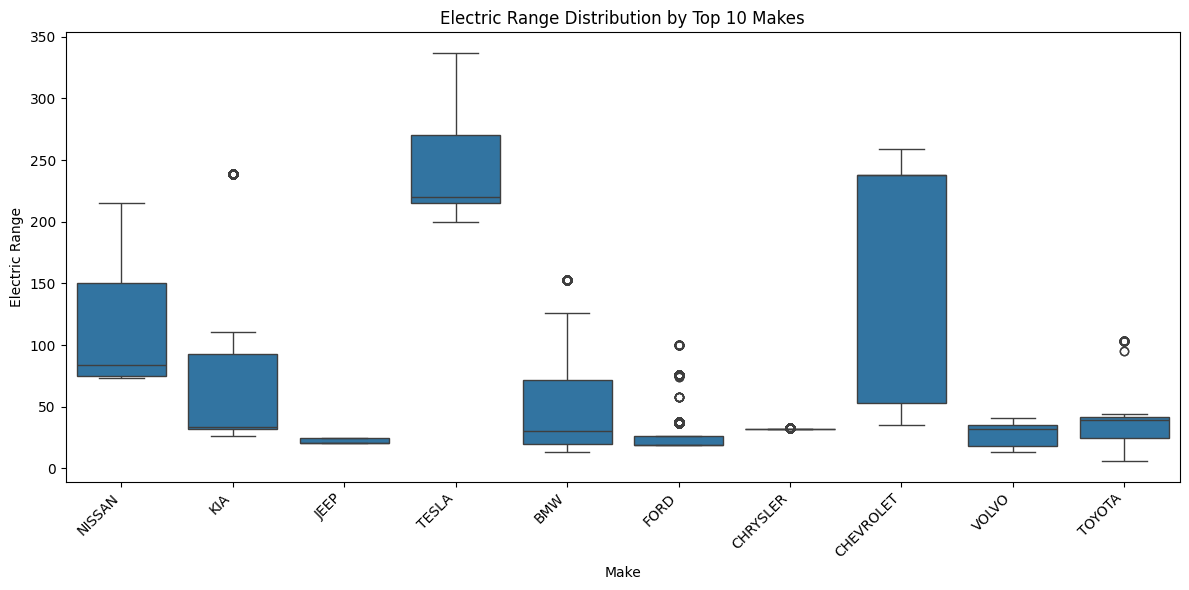

In [125]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top, x="Make", y="Electric Range")
plt.xticks(rotation=45, ha="right")
plt.title("Electric Range Distribution by Top 10 Makes")
plt.tight_layout()
plt.show()


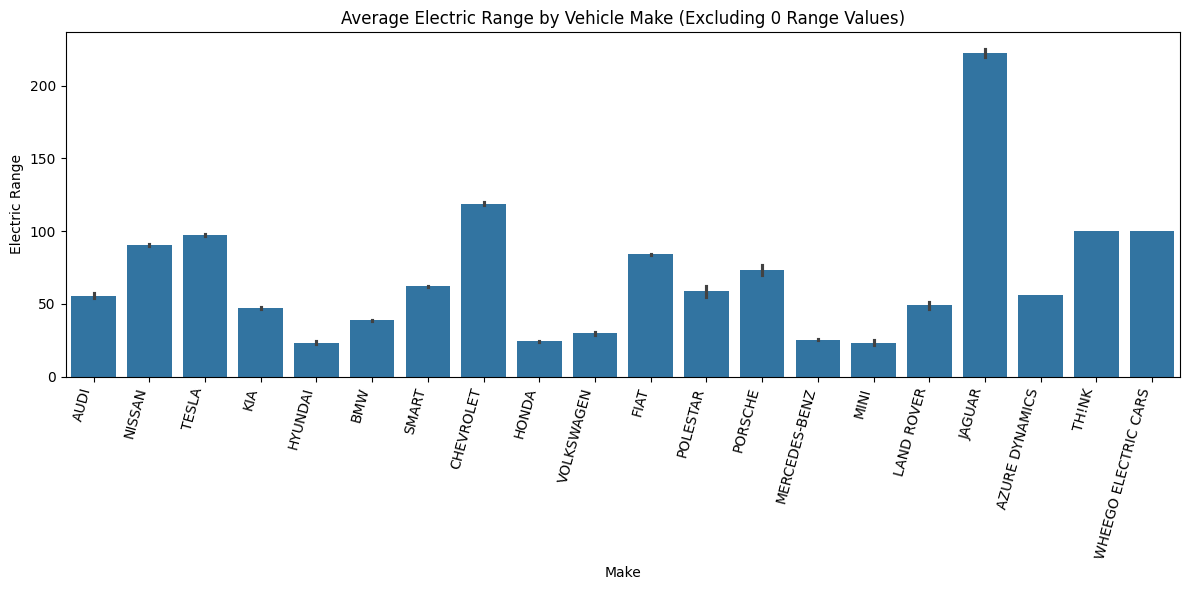

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



#  Visualize the relationship
plt.figure(figsize=(12, 6))
top20_makes = make_range_mean.head(20).index   # optional: only plot top 20 for clarity
sns.barplot(
    data=df[df["Make"].isin(top20_makes)],
    x="Make",
    y="Electric Range"
)
plt.title("Average Electric Range by Vehicle Make (Excluding 0 Range Values)")
plt.xticks(rotation=75, ha='right')
plt.tight_layout()
plt.show()


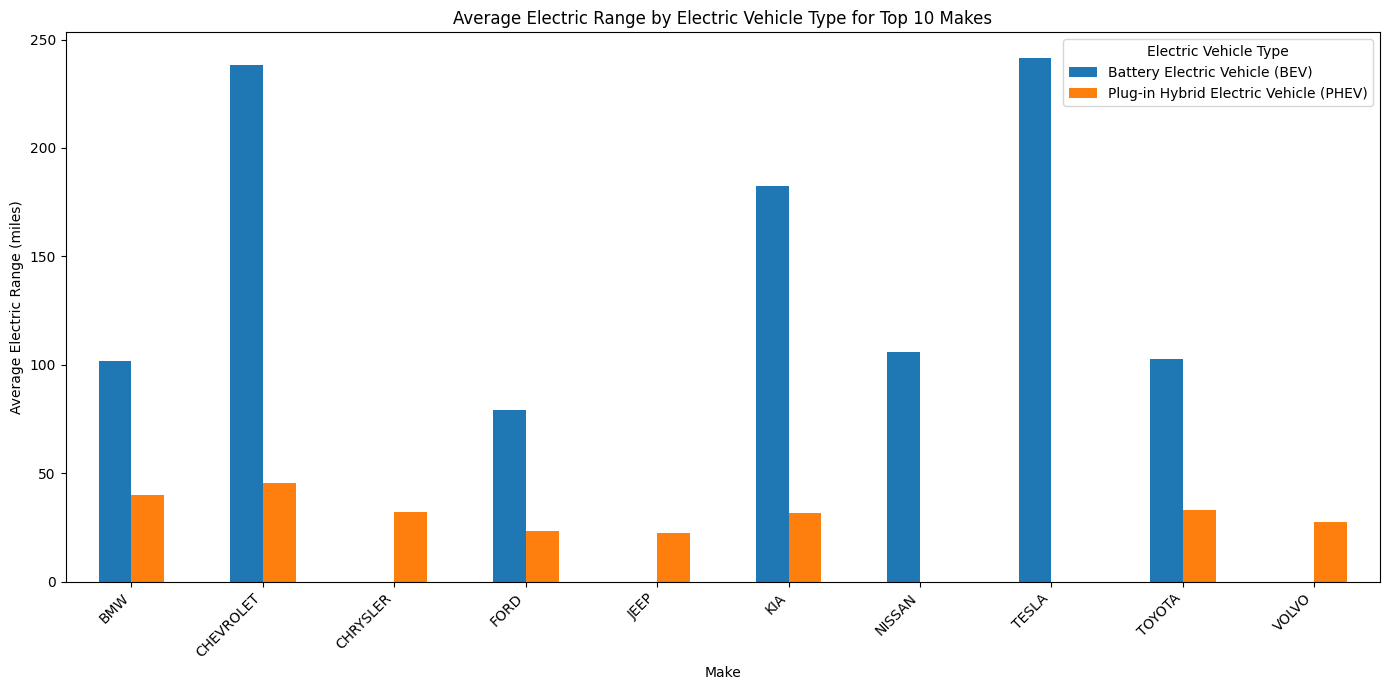

In [127]:
import matplotlib.pyplot as plt

# Get top 10 Makes by count
top_makes = df_clean["Make"].value_counts().nlargest(10).index

# Filter data for top 10 Makes
df_top = df_clean[df_clean["Make"].isin(top_makes)]

# Compute average Electric Range by Make and Electric Vehicle Type
avg_range_top = df_top.groupby(["Make", "Electric Vehicle Type"])["Electric Range"].mean().reset_index()

# Pivot to have Makes as rows, EV Types as columns
pivot_table = avg_range_top.pivot(
    index="Make",
    columns="Electric Vehicle Type",
    values="Electric Range"
).fillna(0)  # Fill missing combinations with 0


pivot_table.plot(
    kind="bar",
    figsize=(14,7)
)

plt.title("Average Electric Range by Electric Vehicle Type for Top 10 Makes")
plt.xlabel("Make")
plt.ylabel("Average Electric Range (miles)")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Electric Vehicle Type")
plt.tight_layout()
plt.show()


In [128]:
from scipy.stats import f_oneway


groups = [df_top[df_top["Make"] == make]["Electric Range"].dropna() for make in top10_makes]

anova_result = f_oneway(*groups)
anova_result


F_onewayResult(statistic=np.float64(32561.112485295085), pvalue=np.float64(0.0))

In [129]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [130]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Suppose df_top contains your EV data and top10_makes is a list of top 10 manufacturers
groups = [df_top[df_top["Make"] == make]["Electric Range"].dropna() for make in top10_makes]

# 1. One-way ANOVA
anova_result = f_oneway(*groups)
print("ANOVA Result:")
print(anova_result)

# 2. Tukey HSD Post Hoc Test
# Prepare data in long format
tukey_data = df_top[df_top["Make"].isin(top10_makes)][["Make", "Electric Range"]].dropna()

tukey = pairwise_tukeyhsd(endog=tukey_data["Electric Range"],
                          groups=tukey_data["Make"],
                          alpha=0.05)

print("\nTukey HSD Results:")
print(tukey)


ANOVA Result:
F_onewayResult(statistic=np.float64(32561.112485295085), pvalue=np.float64(0.0))

Tukey HSD Results:
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1    group2   meandiff p-adj    lower     upper   reject
---------------------------------------------------------------
      BMW CHEVROLET  106.0598    0.0  103.7021  108.4175   True
      BMW  CHRYSLER   -12.849    0.0  -15.8815   -9.8165   True
      BMW      FORD  -18.7891    0.0   -21.778  -15.8002   True
      BMW      JEEP  -22.7117    0.0  -25.3103  -20.1132   True
      BMW       KIA     26.39    0.0   23.6597   29.1203   True
      BMW    NISSAN    60.892    0.0   58.5223   63.2618   True
      BMW     TESLA  196.2449    0.0  194.1803  198.3094   True
      BMW    TOYOTA  -11.7496    0.0  -14.1564   -9.3429   True
      BMW     VOLVO  -17.6875    0.0  -20.5831  -14.7919   True
CHEVROLET  CHRYSLER -118.9088    0.0 -121.7484 -116.0691   True
CHEVROLET      FORD -124.8489    0.0 -127.6419 -122.0